In [30]:
#LINEAR REGRESSION
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/home/ignis/Desktop/LINEAR DATASET.csv")
df



,HOURS,SCORES
0,1,12
1,2,6666
2,3,0
3,4,92
4,5,500


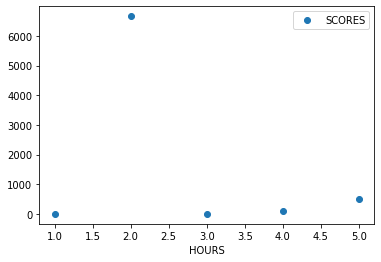

In [31]:

df.plot(x="HOURS", y="SCORES", style="o")
plt.show()


In [18]:
x_mean = df["HOURS"].mean()
y_mean = df["SCORES"].mean()
print(x_mean, y_mean)


3.0 1454.0


In [19]:
df["x"] = df["HOURS"] - x_mean
df["y"] = df["SCORES"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df


,HOURS,SCORES,x,y,x*y,x^2,y^2
0,1,12,-2.0,-1442.0,2884.0,4.0,2079364.0
1,2,6666,-1.0,5212.0,-5212.0,1.0,27164944.0
2,3,0,0.0,-1454.0,-0.0,0.0,2114116.0
3,4,92,1.0,-1362.0,-1362.0,1.0,1855044.0
4,5,500,2.0,-954.0,-1908.0,4.0,910116.0


In [20]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)



-5598.0 10.0 34123584.0


In [21]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation


-0.30304391969965655

In [22]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [23]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [24]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)


1.4142135623730951 2612.4158933829813


In [25]:
m = correlation * (std_deviation_y / std_deviation_x)
m


-559.8000000000001

In [26]:
c = df["SCORES"].mean() - m * df["HOURS"].mean()
c


3133.4

In [27]:
df["y_prediction"] = m * df["HOURS"] + c
df


,HOURS,SCORES,x,y,x*y,x^2,y^2,y_prediction
0,1,12,-2.0,-1442.0,2884.0,4.0,2079364.0,2573.6
1,2,6666,-1.0,5212.0,-5212.0,1.0,27164944.0,2013.8
2,3,0,0.0,-1454.0,-0.0,0.0,2114116.0,1454.0
3,4,92,1.0,-1362.0,-1362.0,1.0,1855044.0,894.2
4,5,500,2.0,-954.0,-1908.0,4.0,910116.0,334.4


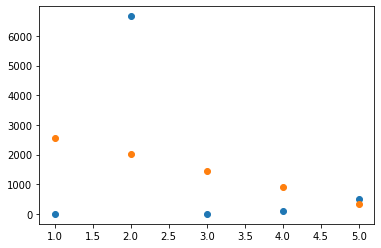

In [29]:
plot1 = plt.scatter(df["HOURS"], df["SCORES"])
plot2 = plt.scatter(df["HOURS"], df["y_prediction"])
plt.show()